# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/My Drive/PGP-AIML/Projects/Project 01/foodhub_order.csv')

In [ ]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

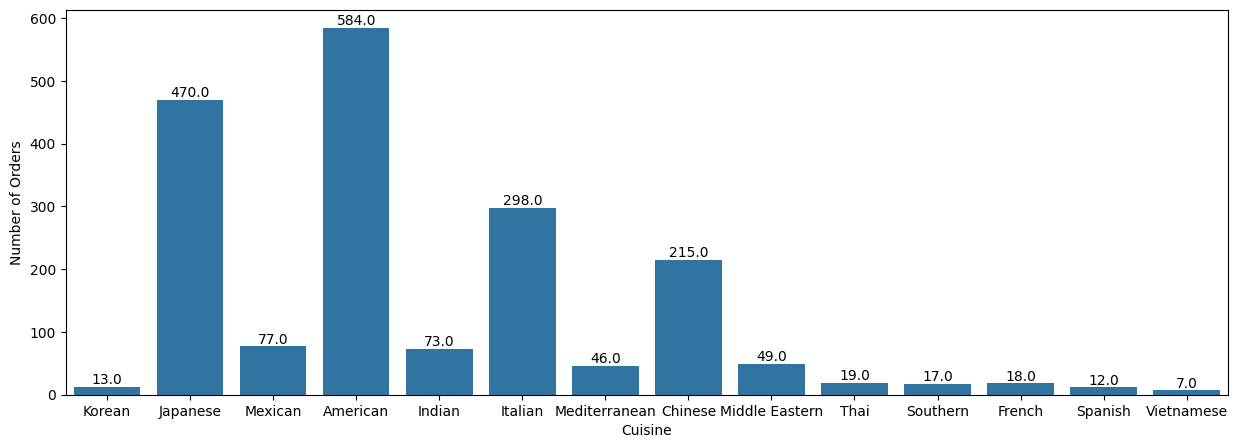

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
# Annotate the bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.ylabel("Number of Orders")
plt.xlabel("Cuisine")
plt.show()

In [ ]:
cuisine_count = df['cuisine_type'].value_counts().reset_index()
cuisine_count.columns = ['Cuisine', 'Number of Orders']

In [ ]:
fig = px.bar(cuisine_count, x='Cuisine', y='Number of Orders', text='Number of Orders', title='Number of Orders by Cuisine Type')
fig.show()

#### Cost of the order

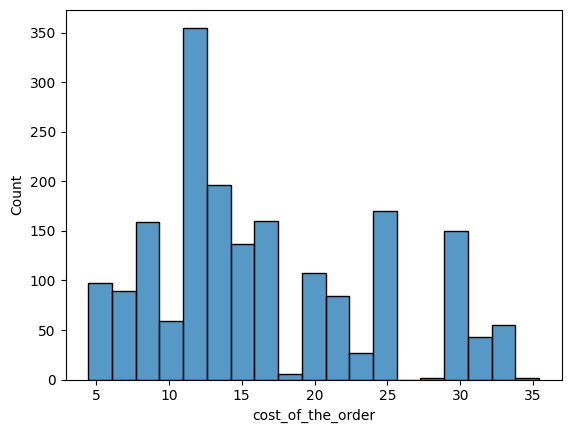

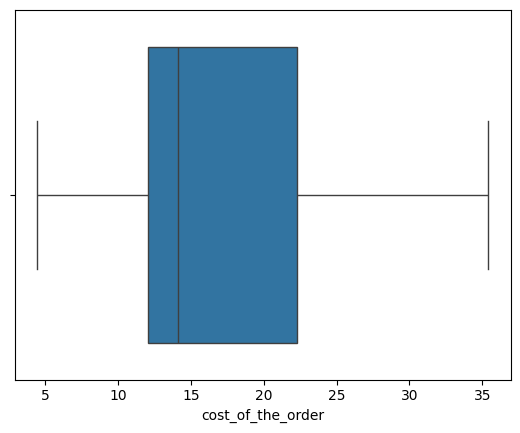

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [ ]:
fig = px.histogram(data_frame=df, x='cost_of_the_order', title='Histogram for cost_of_the_order')
fig.show();
fig = px.box(data_frame=df, x='cost_of_the_order', title='Boxplot for cost_of_the_order')
fig.show()




#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

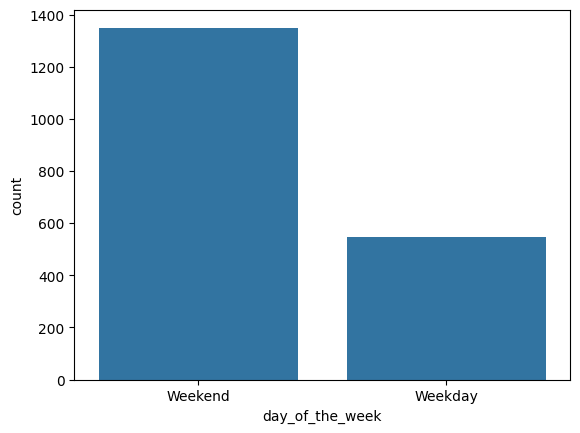

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week')

In [ ]:
day_of_the_week_count = df['day_of_the_week'].value_counts().reset_index()
day_of_the_week_count.columns = ['Day of the week', 'Count']

fig = px.bar(data_frame=day_of_the_week_count, x='Day of the week', y='Count', text='Count', title='Orders by Day of the week')
fig.show()

In [ ]:
# Percentage of top 4 cuisine orders.
(df[df['cuisine_type'].isin(['American', 'Japanese', 'Italian', 'Chinese'])]['order_id'].count()/df.shape[0]*100).round(2)

np.float64(82.56)

In [ ]:
## Percentage of Weekend orders to total orders

(df[df['day_of_the_week'].isin(['Weekend'])]['order_id'].count()/df.shape[0]*100).round(2)

np.float64(71.18)

In [ ]:
# Net revenue from top 4 cuisines.
top_cuisine_data = df[df['cuisine_type'].isin(['American', 'Japanese', 'Italian', 'Chinese'])]

def apply_rev1(x):
  if x>20:
    return x*0.25
  elif x>5:
    return x*.15
  else:
    return 0

top_cuisine_data['cost_of_the_order'].apply(apply_rev1).sum()

np.float64(5013.443499999999)

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
#Check the percentage of each rating.
(df['rating'].value_counts(normalize=True)*100).round(2)

,proportion
rating,
Not given,38.78
5,30.98
4,20.34
3,9.91


In [ ]:
#Check the percentage of each rating given (ie. excluding not-given).

ratings_given = df[df['rating'] != 'Not given'].copy()
ratings_given['rating'].astype(int)
(ratings_given['rating'].value_counts(normalize=True)*100).round(2)


,proportion
rating,
5,50.60
4,33.22
3,16.18


<Axes: xlabel='rating', ylabel='count'>

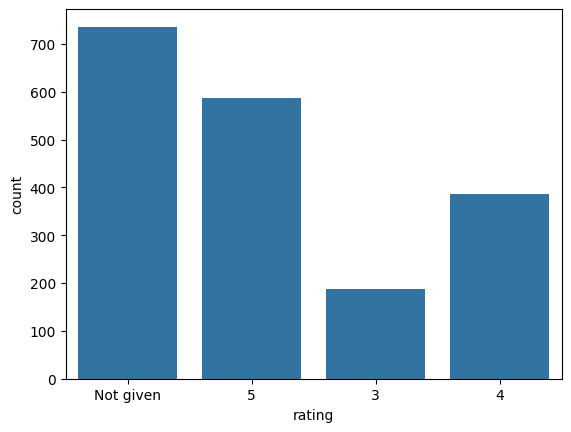

In [ ]:
 ## Plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating')

In [ ]:
rating_count = df['rating'].value_counts().reset_index()
rating_count.columns = ['Rating', 'Count']

fig = px.bar(data_frame=rating_count, x='Rating', y='Count', title='Customer ratings', text='Count')
fig.show()

In [ ]:
# Average rating by cusine?
df.groupby('cuisine_type')['new_rating'].mean().sort_values(ascending=False)

KeyError: 'Column not found: new_rating'

#### Food Preparation time

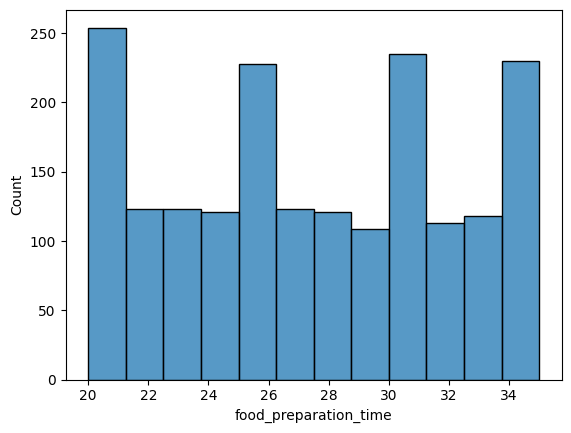

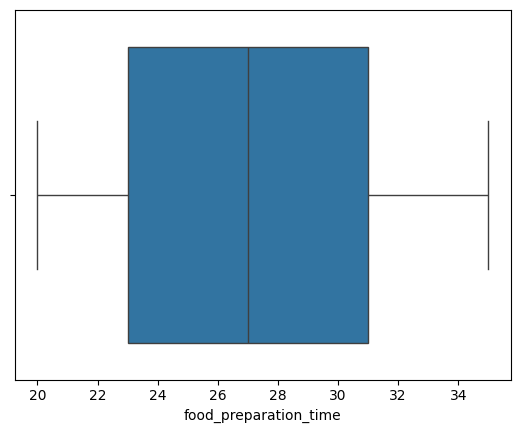

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

In [ ]:
# Plotly graphs.
food_prep_time_counts = df['food_preparation_time'].value_counts().reset_index().copy()
food_prep_time_counts.columns = ['Food Preparation Time', 'Count']

fig = px.bar(data_frame=food_prep_time_counts, x='Food Preparation Time', y='Count', text='Count')
fig.show();
fig = px.box(data_frame=df, x='food_preparation_time', title='Food Preparation Time')
fig.show();

#### Delivery time

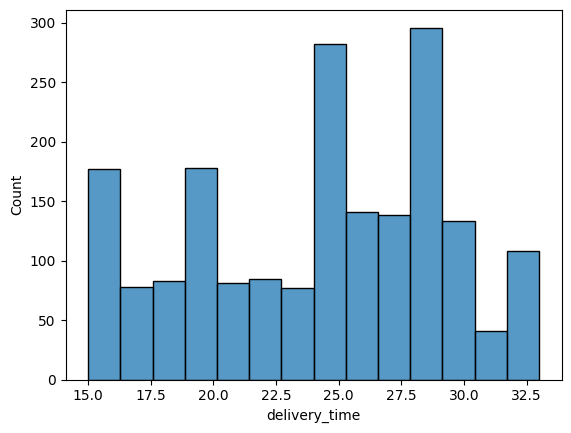

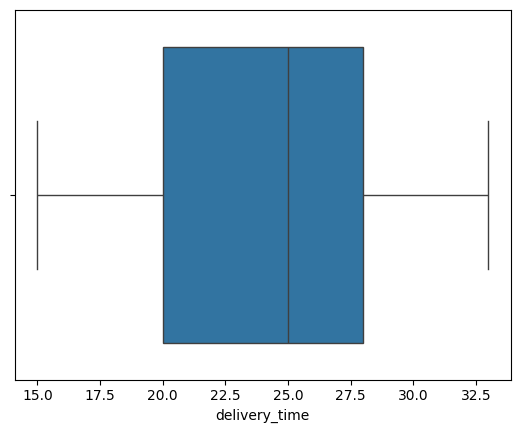

In [ ]:
#plot the histogram NS boxplot for the delivery time
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

In [ ]:
# Plotly graphs
delivery_time_counts = df['delivery_time'].value_counts().reset_index().copy()
delivery_time_counts.columns = ['Delivery Time', 'Count']

fig = px.bar(data_frame=delivery_time_counts, x='Delivery Time', y='Count')
fig.show()

fig = px.box(data_frame=df, x='delivery_time')
fig.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts(ascending=False).reset_index()[:5]

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [ ]:
df['restaurant_name'].value_counts(ascending=False).reset_index()[:5]['count'].sum()#/df.shape[0]

np.int64(634)

#### The top 5 restaurants are
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

In [ ]:
numeric_cols = ['customer_id', 'order_id', 'food_preparation_time', 'delivery_time', 'cost_of_the_order']
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(correlation_matrix, text_auto=True, title='Correlation matrix of FoodHub Order data', color_continuous_scale="Plasma" )
fig.update_layout(title_x=0.5)
fig.show()


#### Cuisine vs Cost of the order

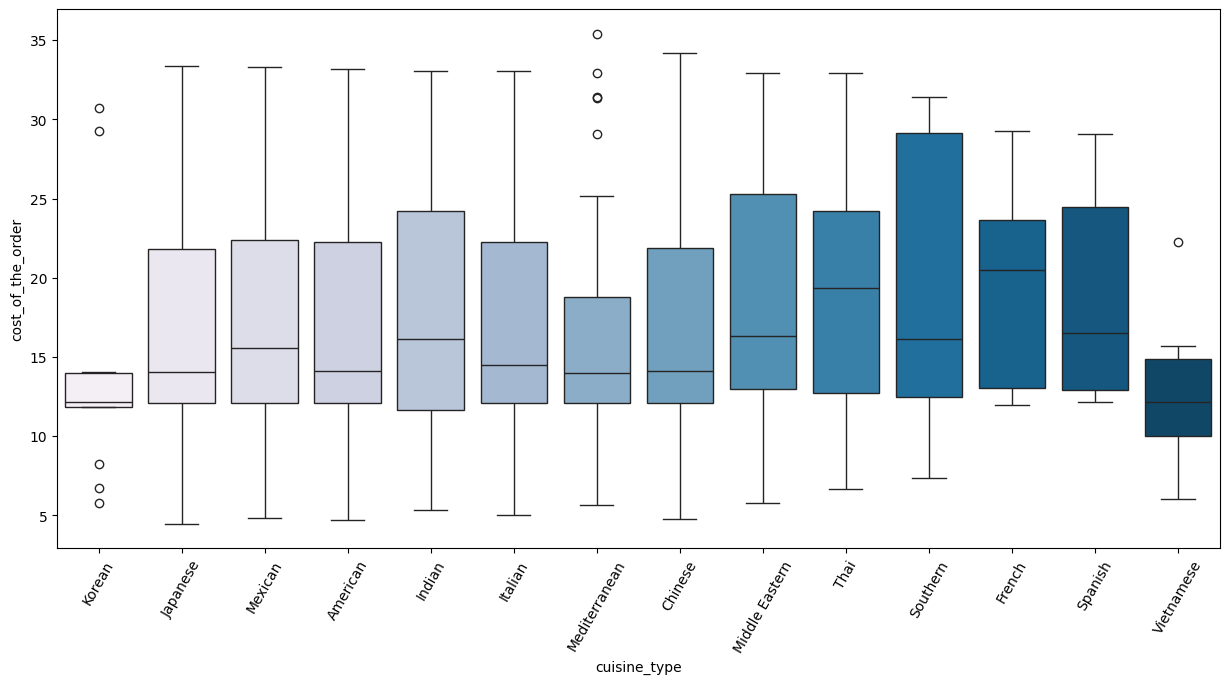

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

In [ ]:
fig = px.box(data_frame=df, x='cuisine_type', y='cost_of_the_order', title='Cusine Type vs Cost of the Order')
fig.show()

#### Cuisine vs Food Preparation time

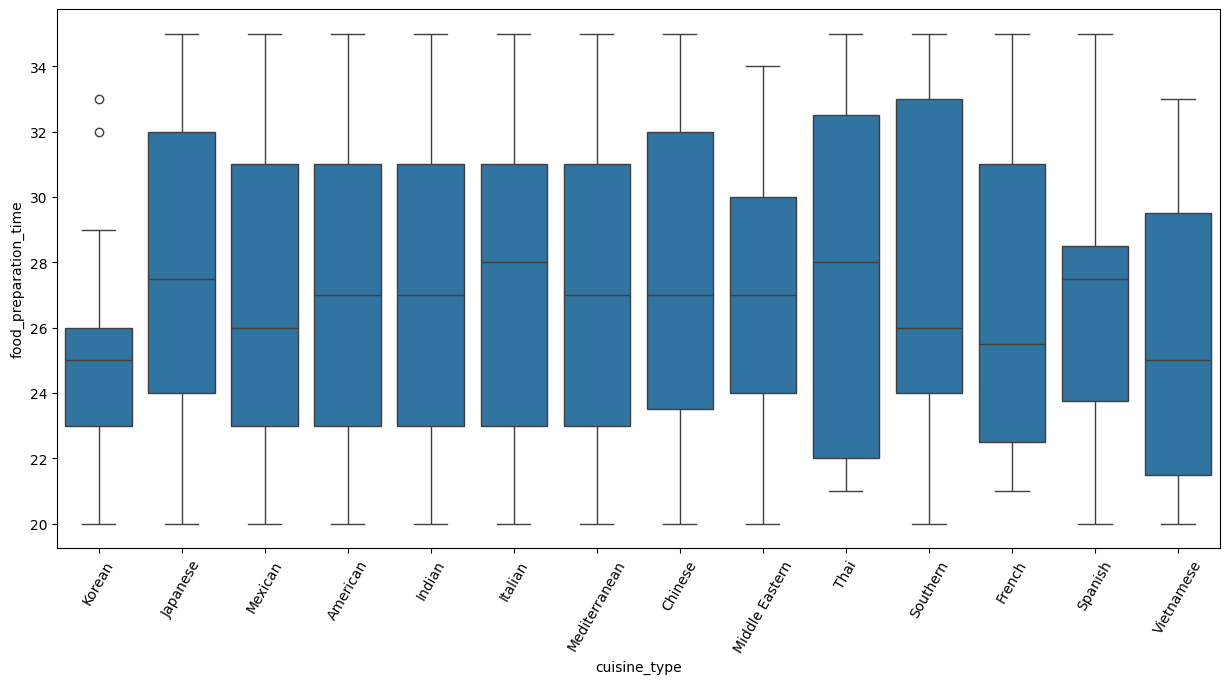

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

In [ ]:
fig = px.box(data_frame=df, x='cuisine_type', y='food_preparation_time', title='Food Preparation Time by Cuisine Type')
fig.update_layout(title_x=0.5)
fig.show();

#### Day of the Week vs Delivery time

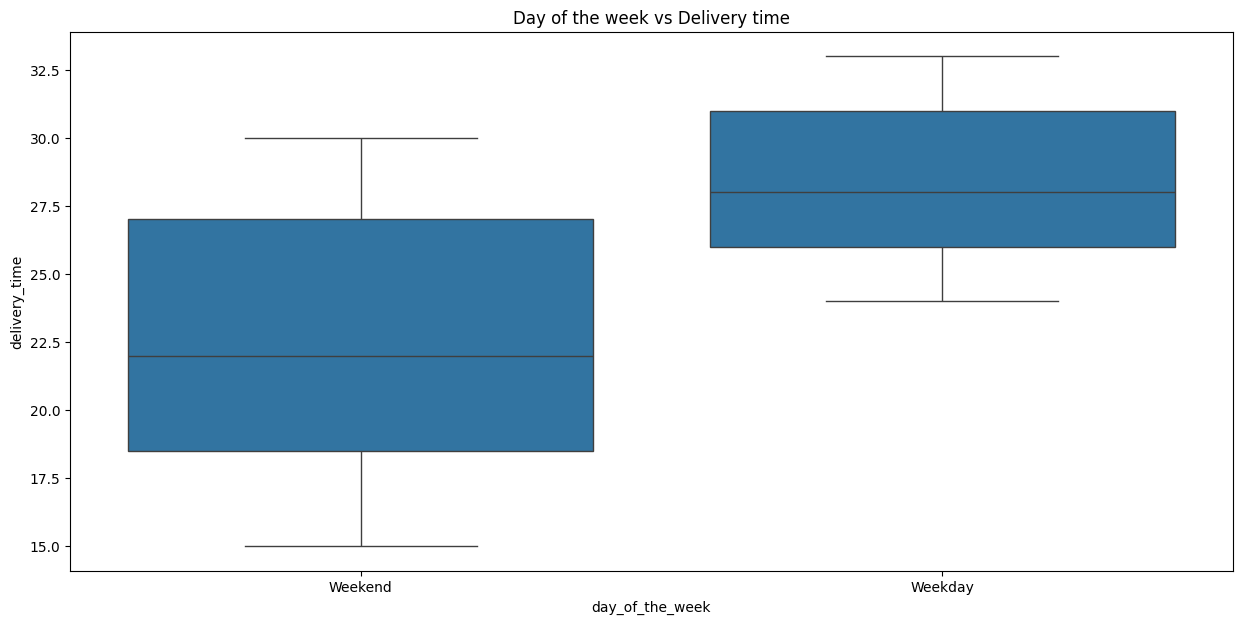

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.title('Day of the week vs Delivery time')
plt.show()

In [ ]:
# Pyplot graphs.

fig = px.box(data_frame=df, x='day_of_the_week', y='delivery_time', title='Day of the week vs Delivery time')
fig.update_layout(title_x=0.5)
fig.show()


#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#### Observations
* The top 5 restaurants generated significant portion of the sales.

In [ ]:
rating_delivery_time = df.groupby('rating')['delivery_time'].mean().reset_index().copy()
fig = px.scatter(data_frame=rating_delivery_time, x='rating', y='delivery_time', title='Rating vs Delivery Time')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(size=12, symbol='square'))
fig.show();

fig=px.line(data_frame=rating_delivery_time, x='rating', y='delivery_time',title='Rating vs Delivery Time', markers=True)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(size=12, symbol='square'))
fig.show();

#### Rating vs Delivery time

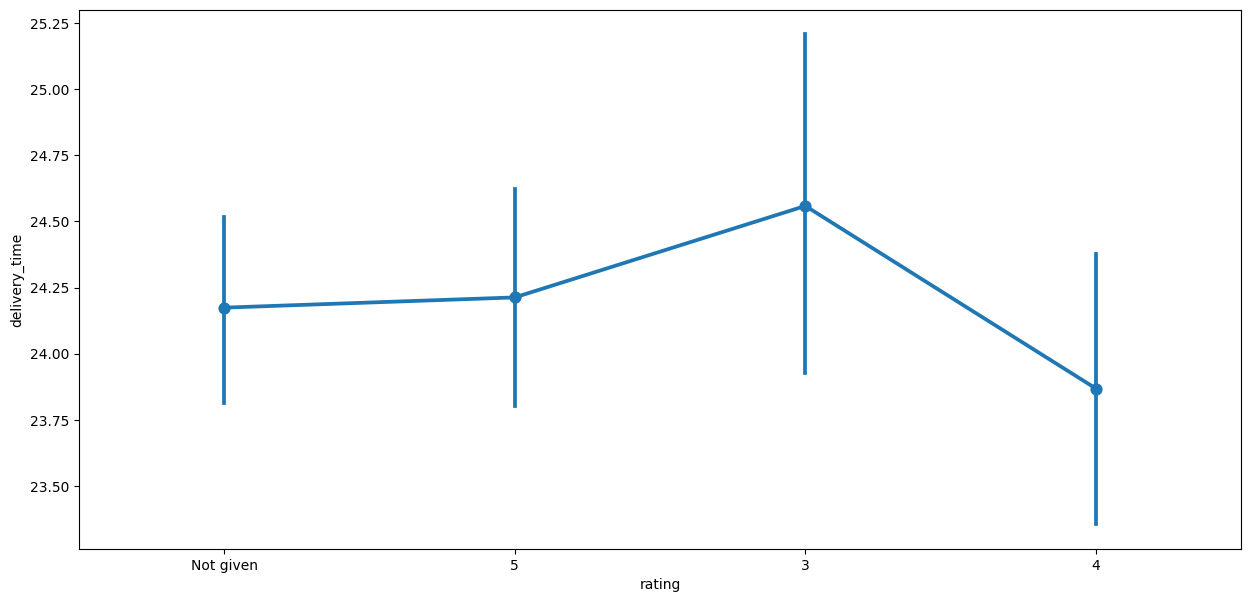

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

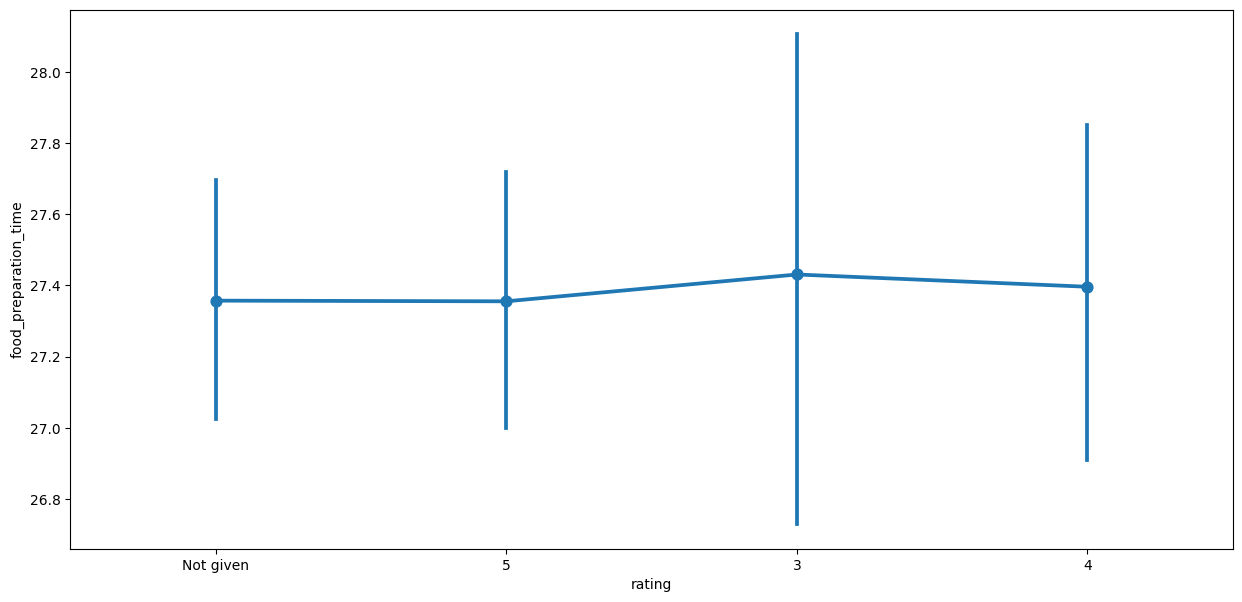

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='food_preparation_time')  ## Visualize the relationship between rating and food preparation time using pointplot
plt.show()

In [ ]:
rating_fp_time = df.groupby('rating')['food_preparation_time'].mean().reset_index().copy()
fig = px.scatter(data_frame=rating_fp_time, x='rating', y='food_preparation_time', title='Rating vs Food Preparation Time')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(size=12, symbol='square'))
fig.show();

fig=px.line(data_frame=rating_fp_time, x='rating', y='food_preparation_time',title='Rating vs Food Preparation', markers=True)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(size=12, symbol='square'))
fig.show();

#### Rating vs Cost of the order

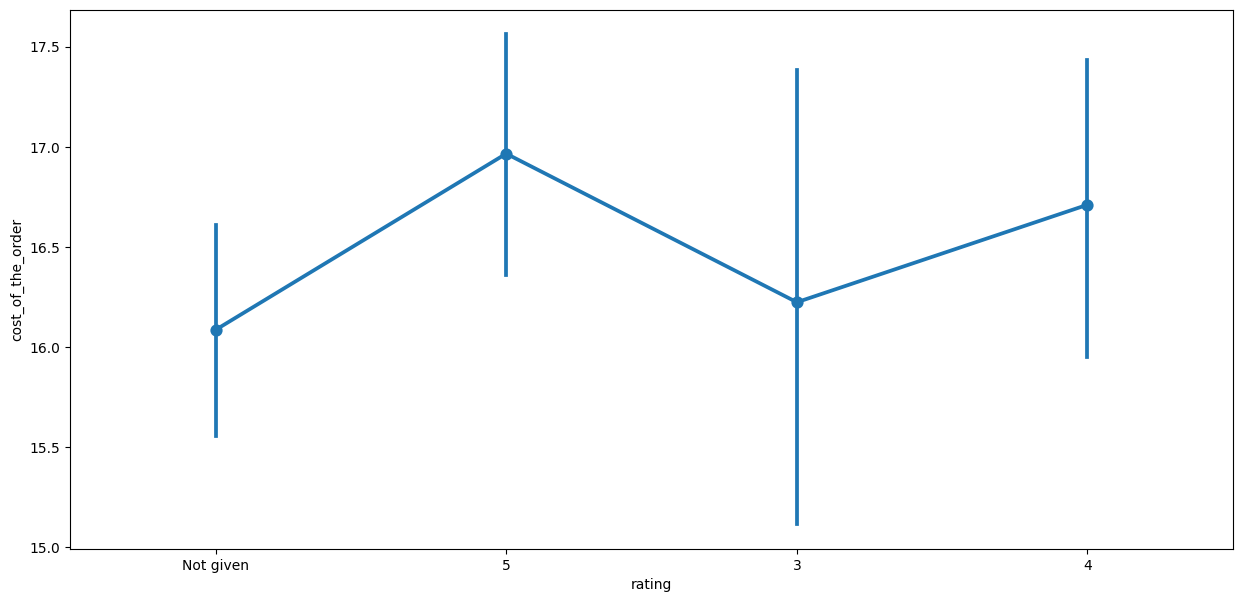

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order')   ## Visualize the relationship between rating and cost of the order using pointplot
plt.show()

In [ ]:
rating_cost = df.groupby('rating')['cost_of_the_order'].mean().reset_index().copy()
fig = px.line(data_frame=rating_cost, x='rating', y='cost_of_the_order', title='Rating vs Cost of the Order', markers=True)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(size=12, symbol='square'))
fig.show()

#### Correlation among variables

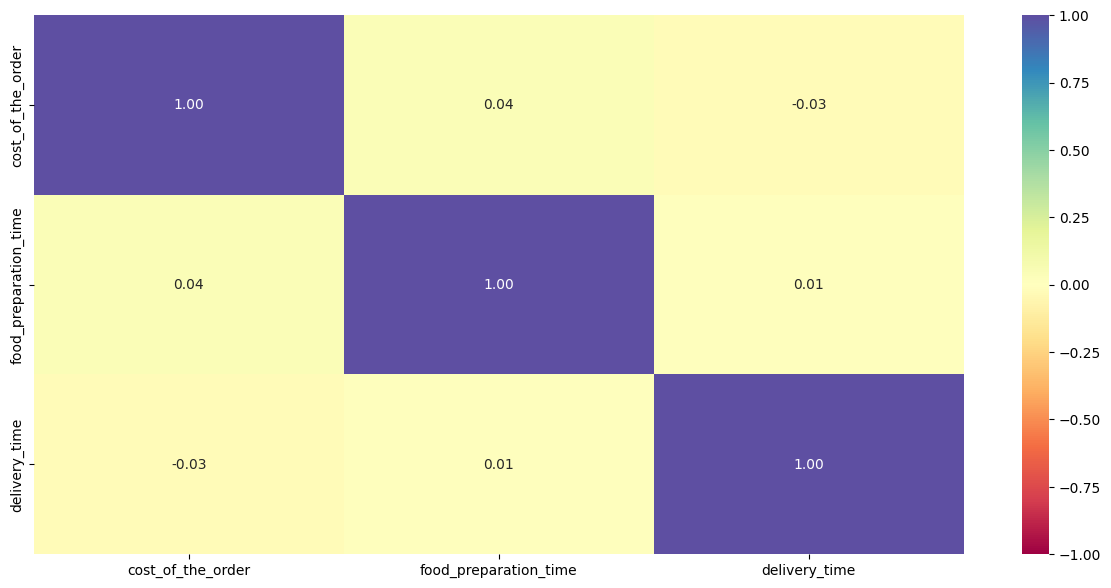

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
(df[df['total_time'] > 60].count()['order_id']*100/df.shape[0]).round(2)





np.float64(10.54)

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Get the mean delivery time on weekends and print it
print('The mean delivery time on weekend is around', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()), 'minutes')






The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Most popular cuisines are American, Japanese, Italian, Chinese, Mexican.
* Weekend orders are significantly higher than Weekday orders.
* Based on the rating pattern, customers seem to be willing to pay the cost for a good service.
* Data showed no correlation between the rating and average food preparation and delivery times. It suggests the factors other than delivery times affect the ratings.
* Limitations
   - Data has no ratings lower than 3, indicating disssatisfied customers are not providing feedback.
   - Demographic information will help to anlayze the food preferences.
   - Weather conditions will help to analyze its affect on orders and delivery times.



### Recommendations:

* Order demand:  Given the strong demand, optimize the resource  allocation and supplies to handle the order volume effectively on weekends. Find ways to attract more customers during the week, for example offering Weekday only deals or promotions..
* Restaurant Options: Given the strong demand for American, Japanese, Italian and Chinese, add more restaurants that serve these cuisines. Also, customers gave high rating for Spanish, Thai, Indian, and Mexican, add restaurants serving these cuisines.
* Customers: Give special discounts or offers to loyal customers to keep them coming back. Attract new customers to try the service with new customer only deals.  Encourage and incentivize the customers who provide genuine feedback.
* Service Quality: Customer satisfaction largely driven by food quality and delivery time. Explore opportunities with restaurants to improve the food preparation and delivery times. When loyal customers order, suggest them to try out other cuisines.



---